# Support Vector Machine Algorithm (SVM)

## Import libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import IsolationForest

## Reading in the dataset

In [6]:
df = pd.read_csv("forestfires.csv")
print(df.head(10))

  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
5   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0  ...         0   
6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0  ...         0   
7   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0  ...         0   
8   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0  ...         0   
9   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0    

In [7]:
print(f"Dataset has the size {df.shape[0]}")

Dataset has the size 517


## Data Understanding

### day
- The name of the day that the data is collected


### DMC (Duff Moisture Control)
- Duff is the layer of partyl decayed organic material that accumulates on the forest floor
- Average moisture content of loosely compacted organic layers
- Fuel moisture of decomposed organic 


### DC (Drought Code) 
- Average moisture content of deep, compact, organic layers
- Can be used to indicate how seasonal drought effects on forest fules and the amount of smoldering in deep duff layers

### ISI (Initial Spread Index)
- Numeric rating of the expected rate of how much the fire will spread
- Based on wind speed and FFMC


### RH (Relative humidity)
- A ratio of the amount of moisture in the air to the amount of moisture necessary to saturate the air
- A low RH results in greater potential for the fire to grow

### wind
- Measurement of the speed of the wind
- Measured in mph

### rain
- A measurement of 

### size_category
- Categorizes whether a forest fire is small or large

## Data Visualization

### Pie Figure

A pie figure of the number of fires in August

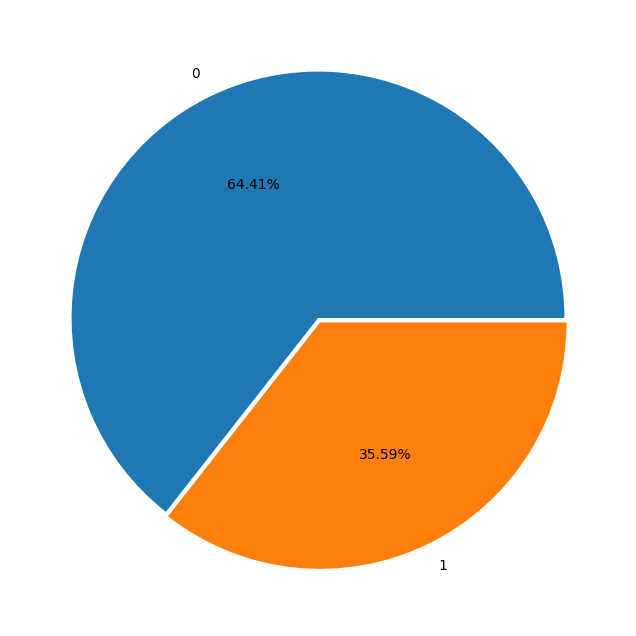

In [8]:
pd.set_option("display.max_columns", 31)
y_count = df.monthaug.value_counts().reset_index() \
        .rename(columns={'count':'counts'})

plt.figure(figsize=(8, 8))

plt.pie(x = y_count.counts, 
        labels = y_count['monthaug'], 
        autopct='%1.2f%%', 
        explode=(0,0.02))

plt.show()

### Bar Plot
A bar plot figure of the number of fires for each day

#### Observation
Sunday tends to have the most incidents of forest fires, while Wednesday tends to have the least

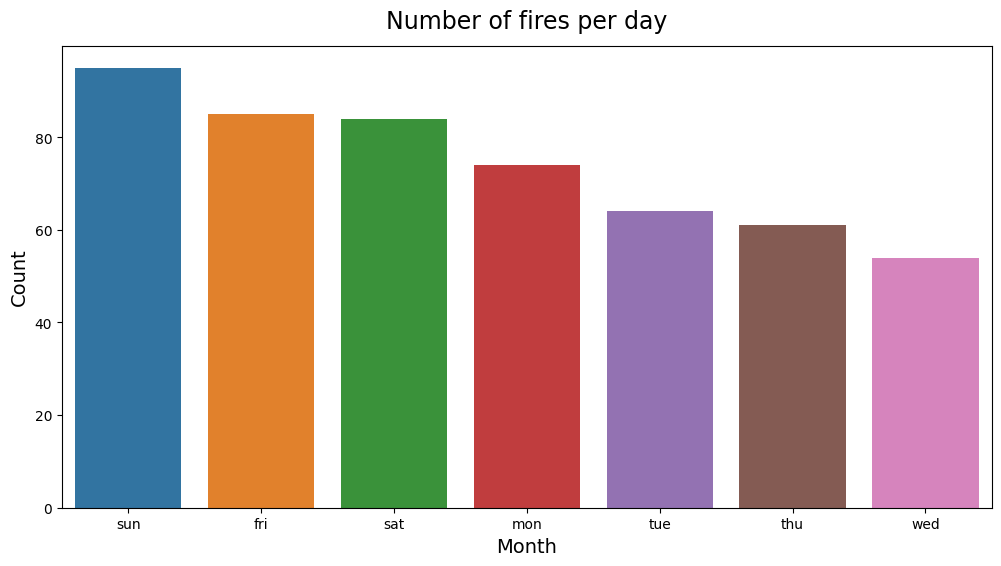

In [9]:
day_df = df.groupby(['day']).size().reset_index() \
        .rename(columns={0:'count'}) \
        .sort_values('count', ascending=False)

day_df.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x = 'day', y = 'count', hue='day', data=day_df)
plt.title("Number of fires per day", fontsize = 17, y = 1.02)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## Label Encoder

Label encoding converts categorical variables, such as string, into a numerical format as most machine learn machine learning models can only work with numerical data

In [10]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
rain_df = df.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)

In [11]:
def plot_bar(category: str):
        info_df = df.groupby(['size_category', category]).size().reset_index() \
                .rename(columns={0:'count'}) \
                .sort_values('count', ascending=False).astype(str)
    
        plt.figure(figsize=(30,25))
        info_df['size_category'] = info_df['size_category'].astype(str)
        sns.barplot(x = category, y='count', hue='size_category', data=info_df)
        
        plt.title(f"{category} in category of forest", y = 1.02, fontsize = 17)
        plt.xlabel(category, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.show()

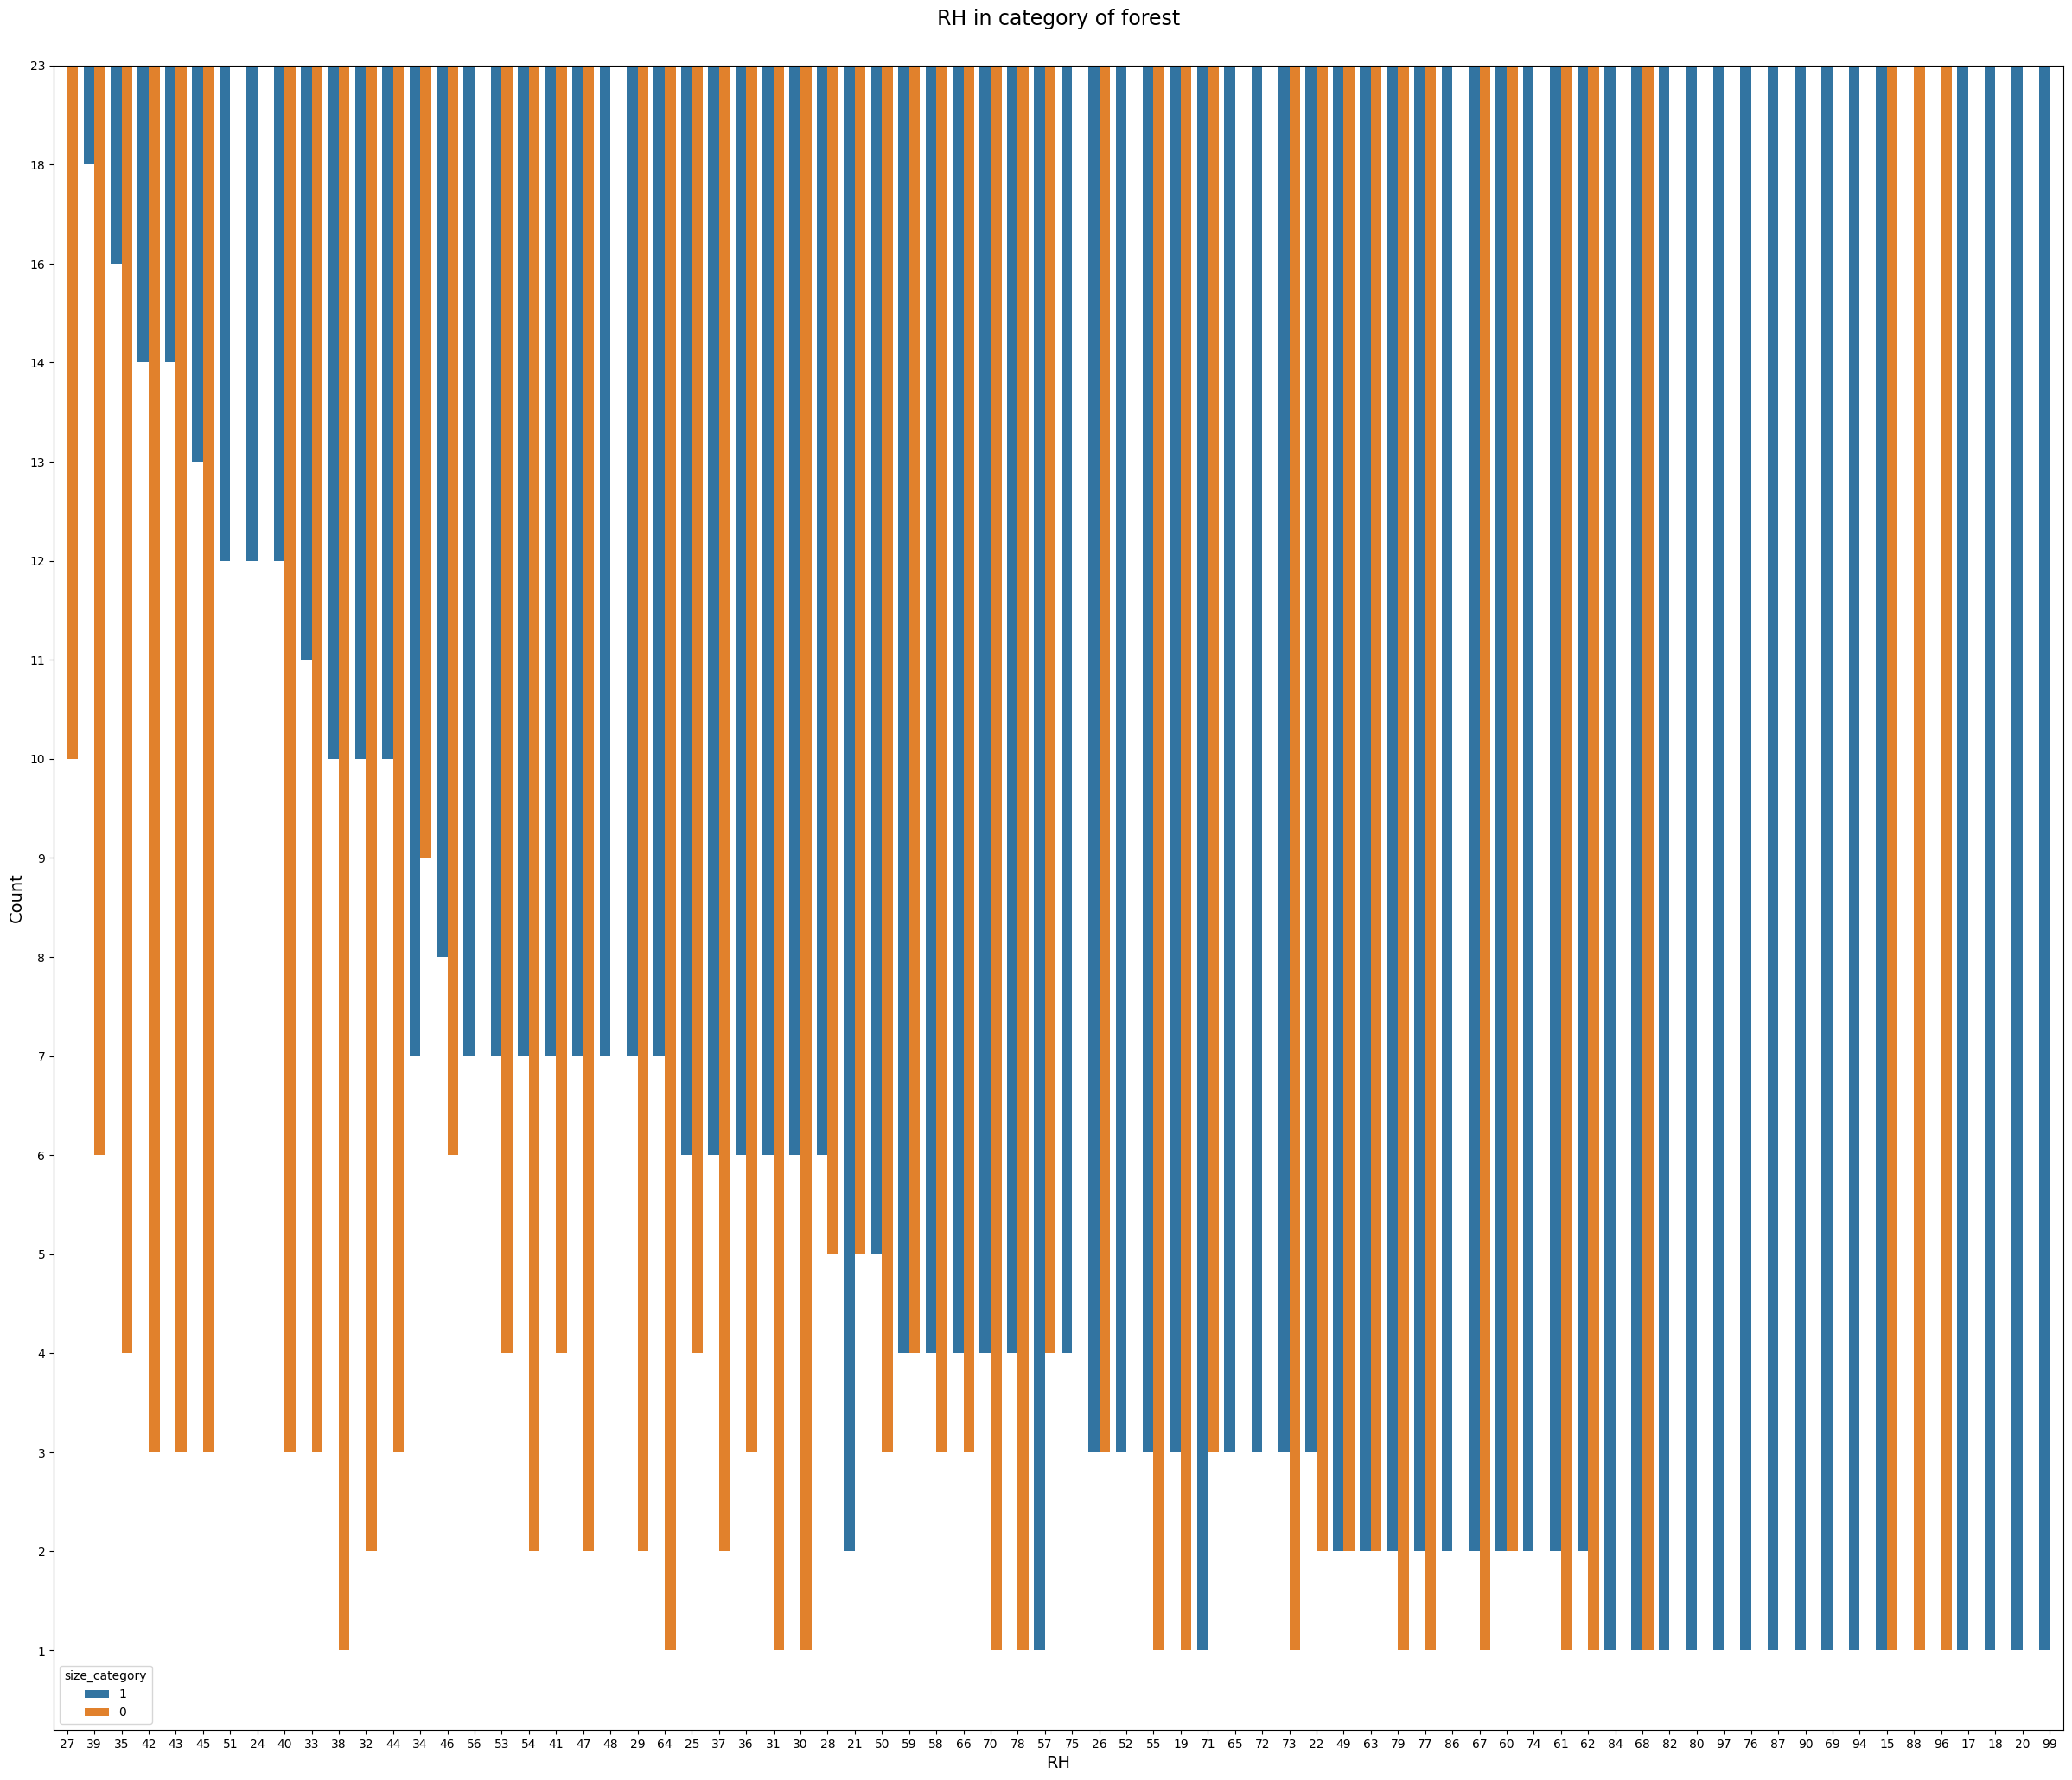

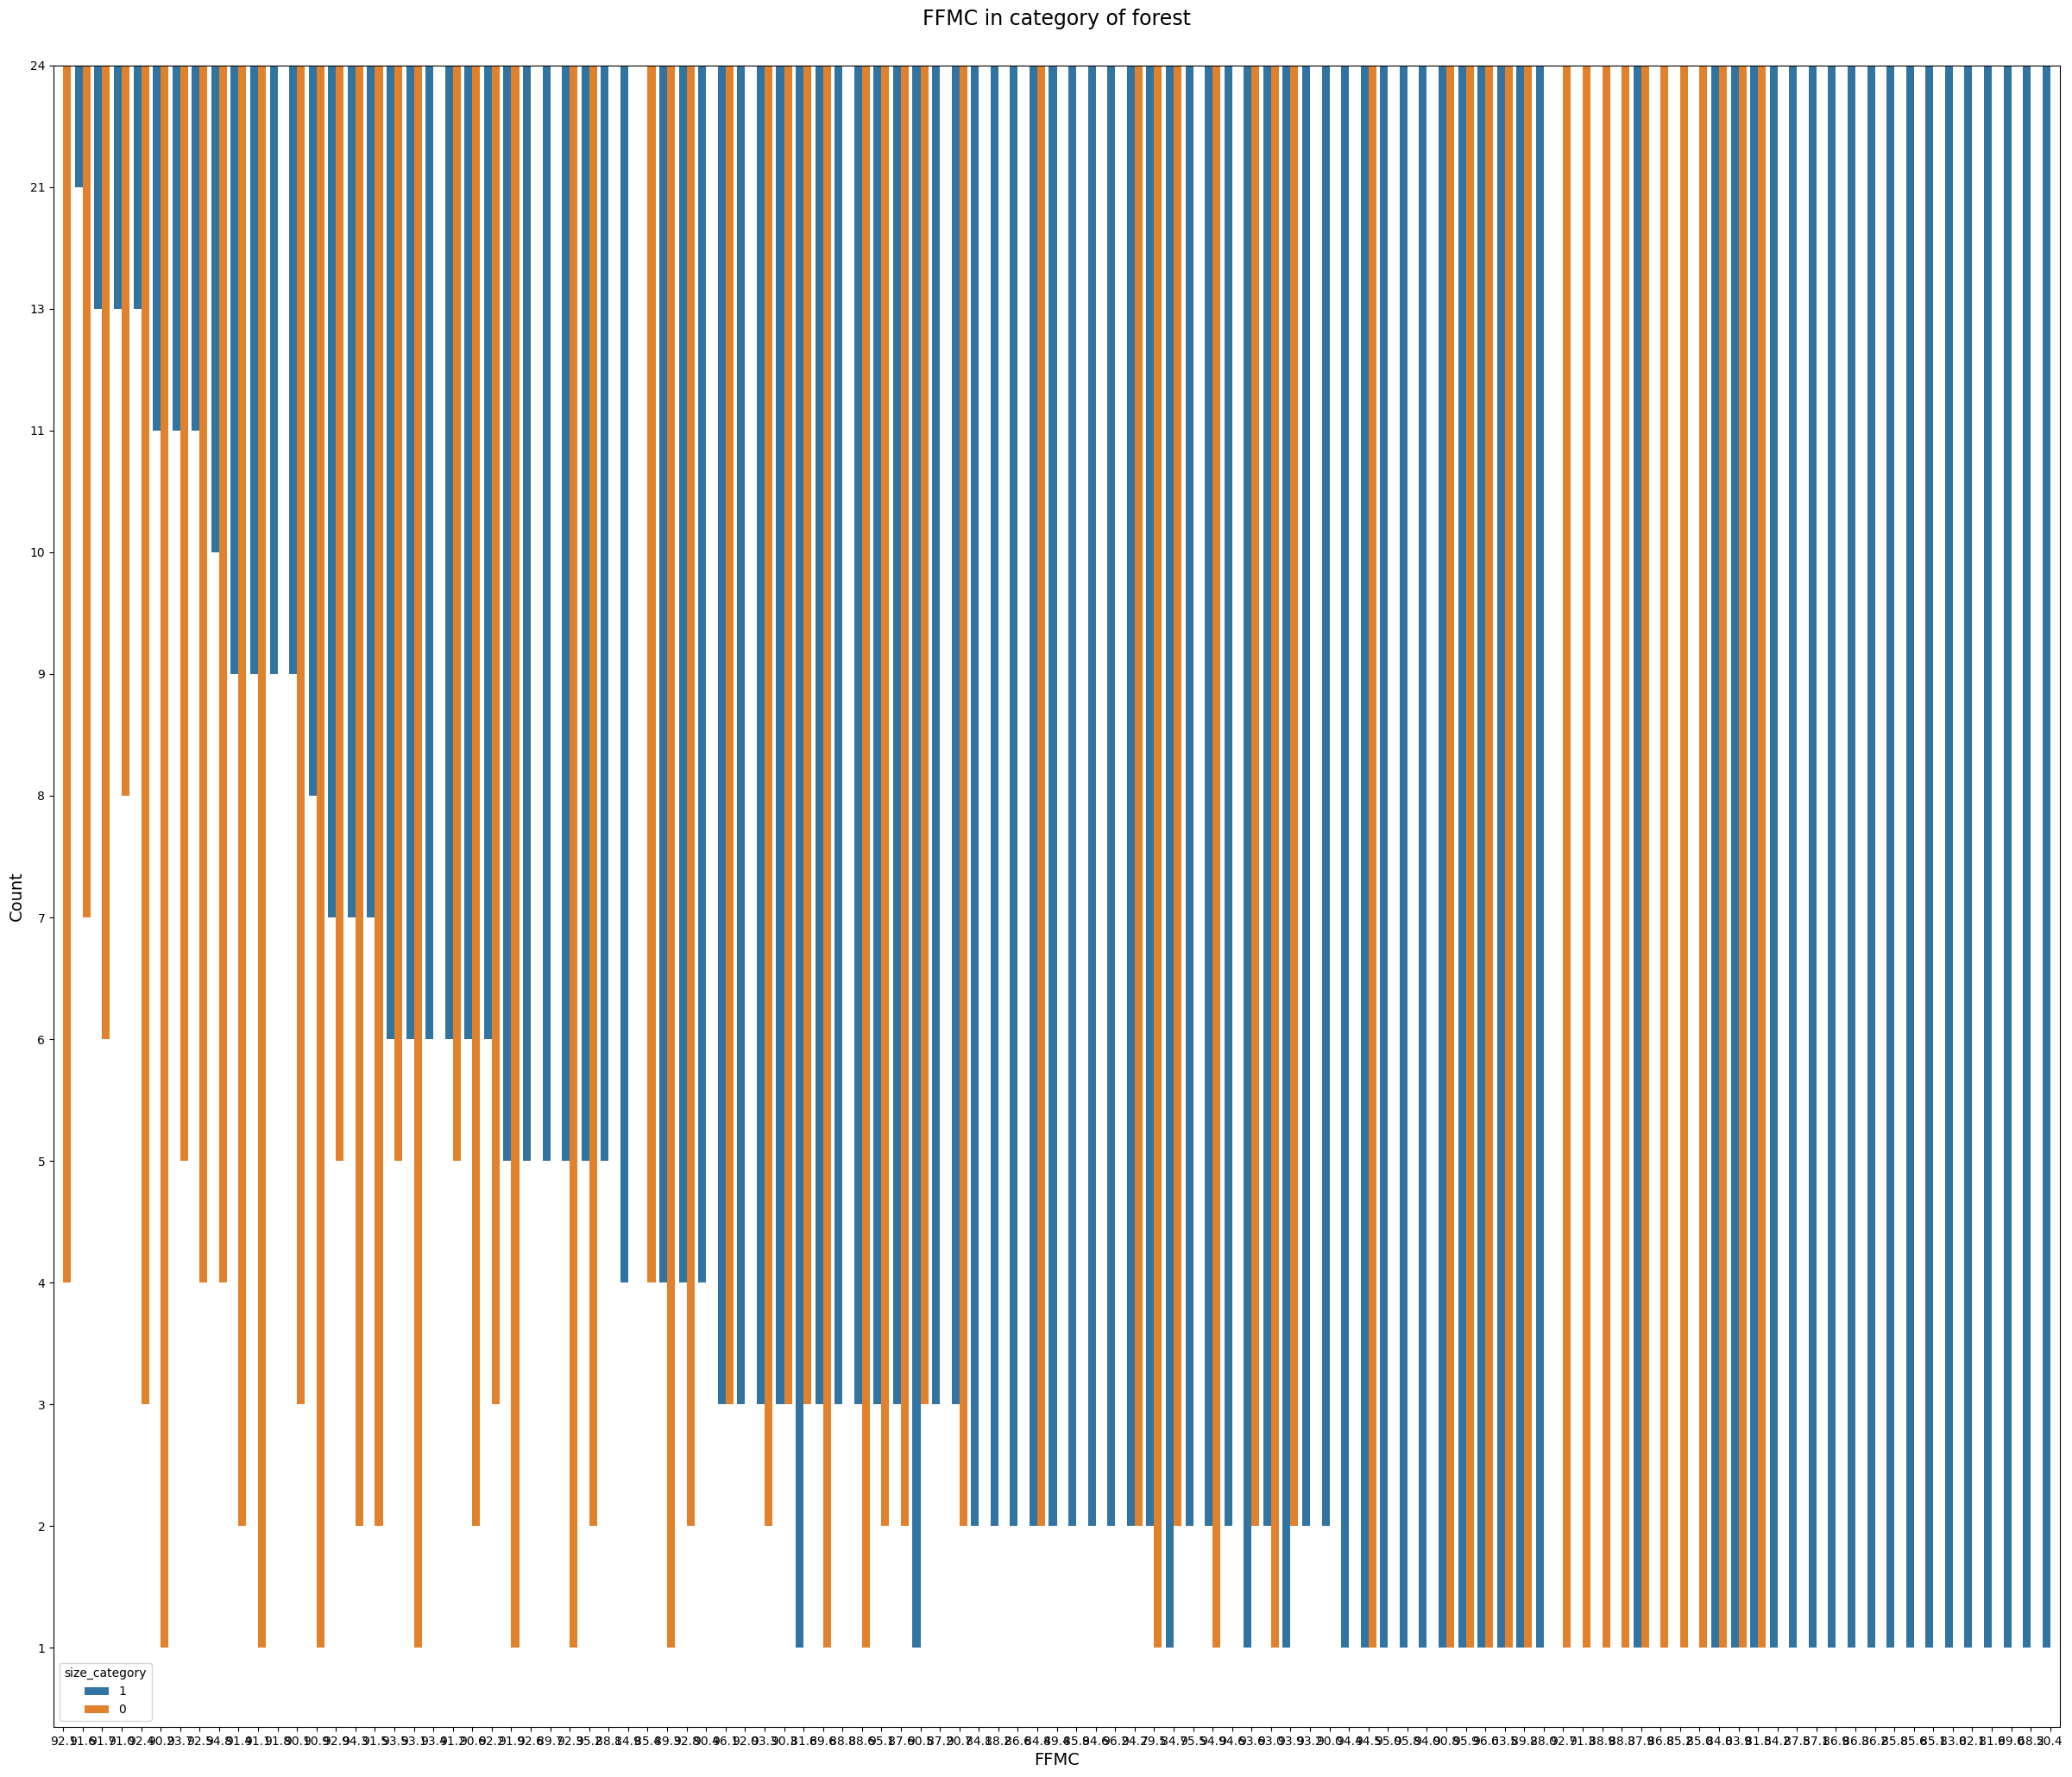

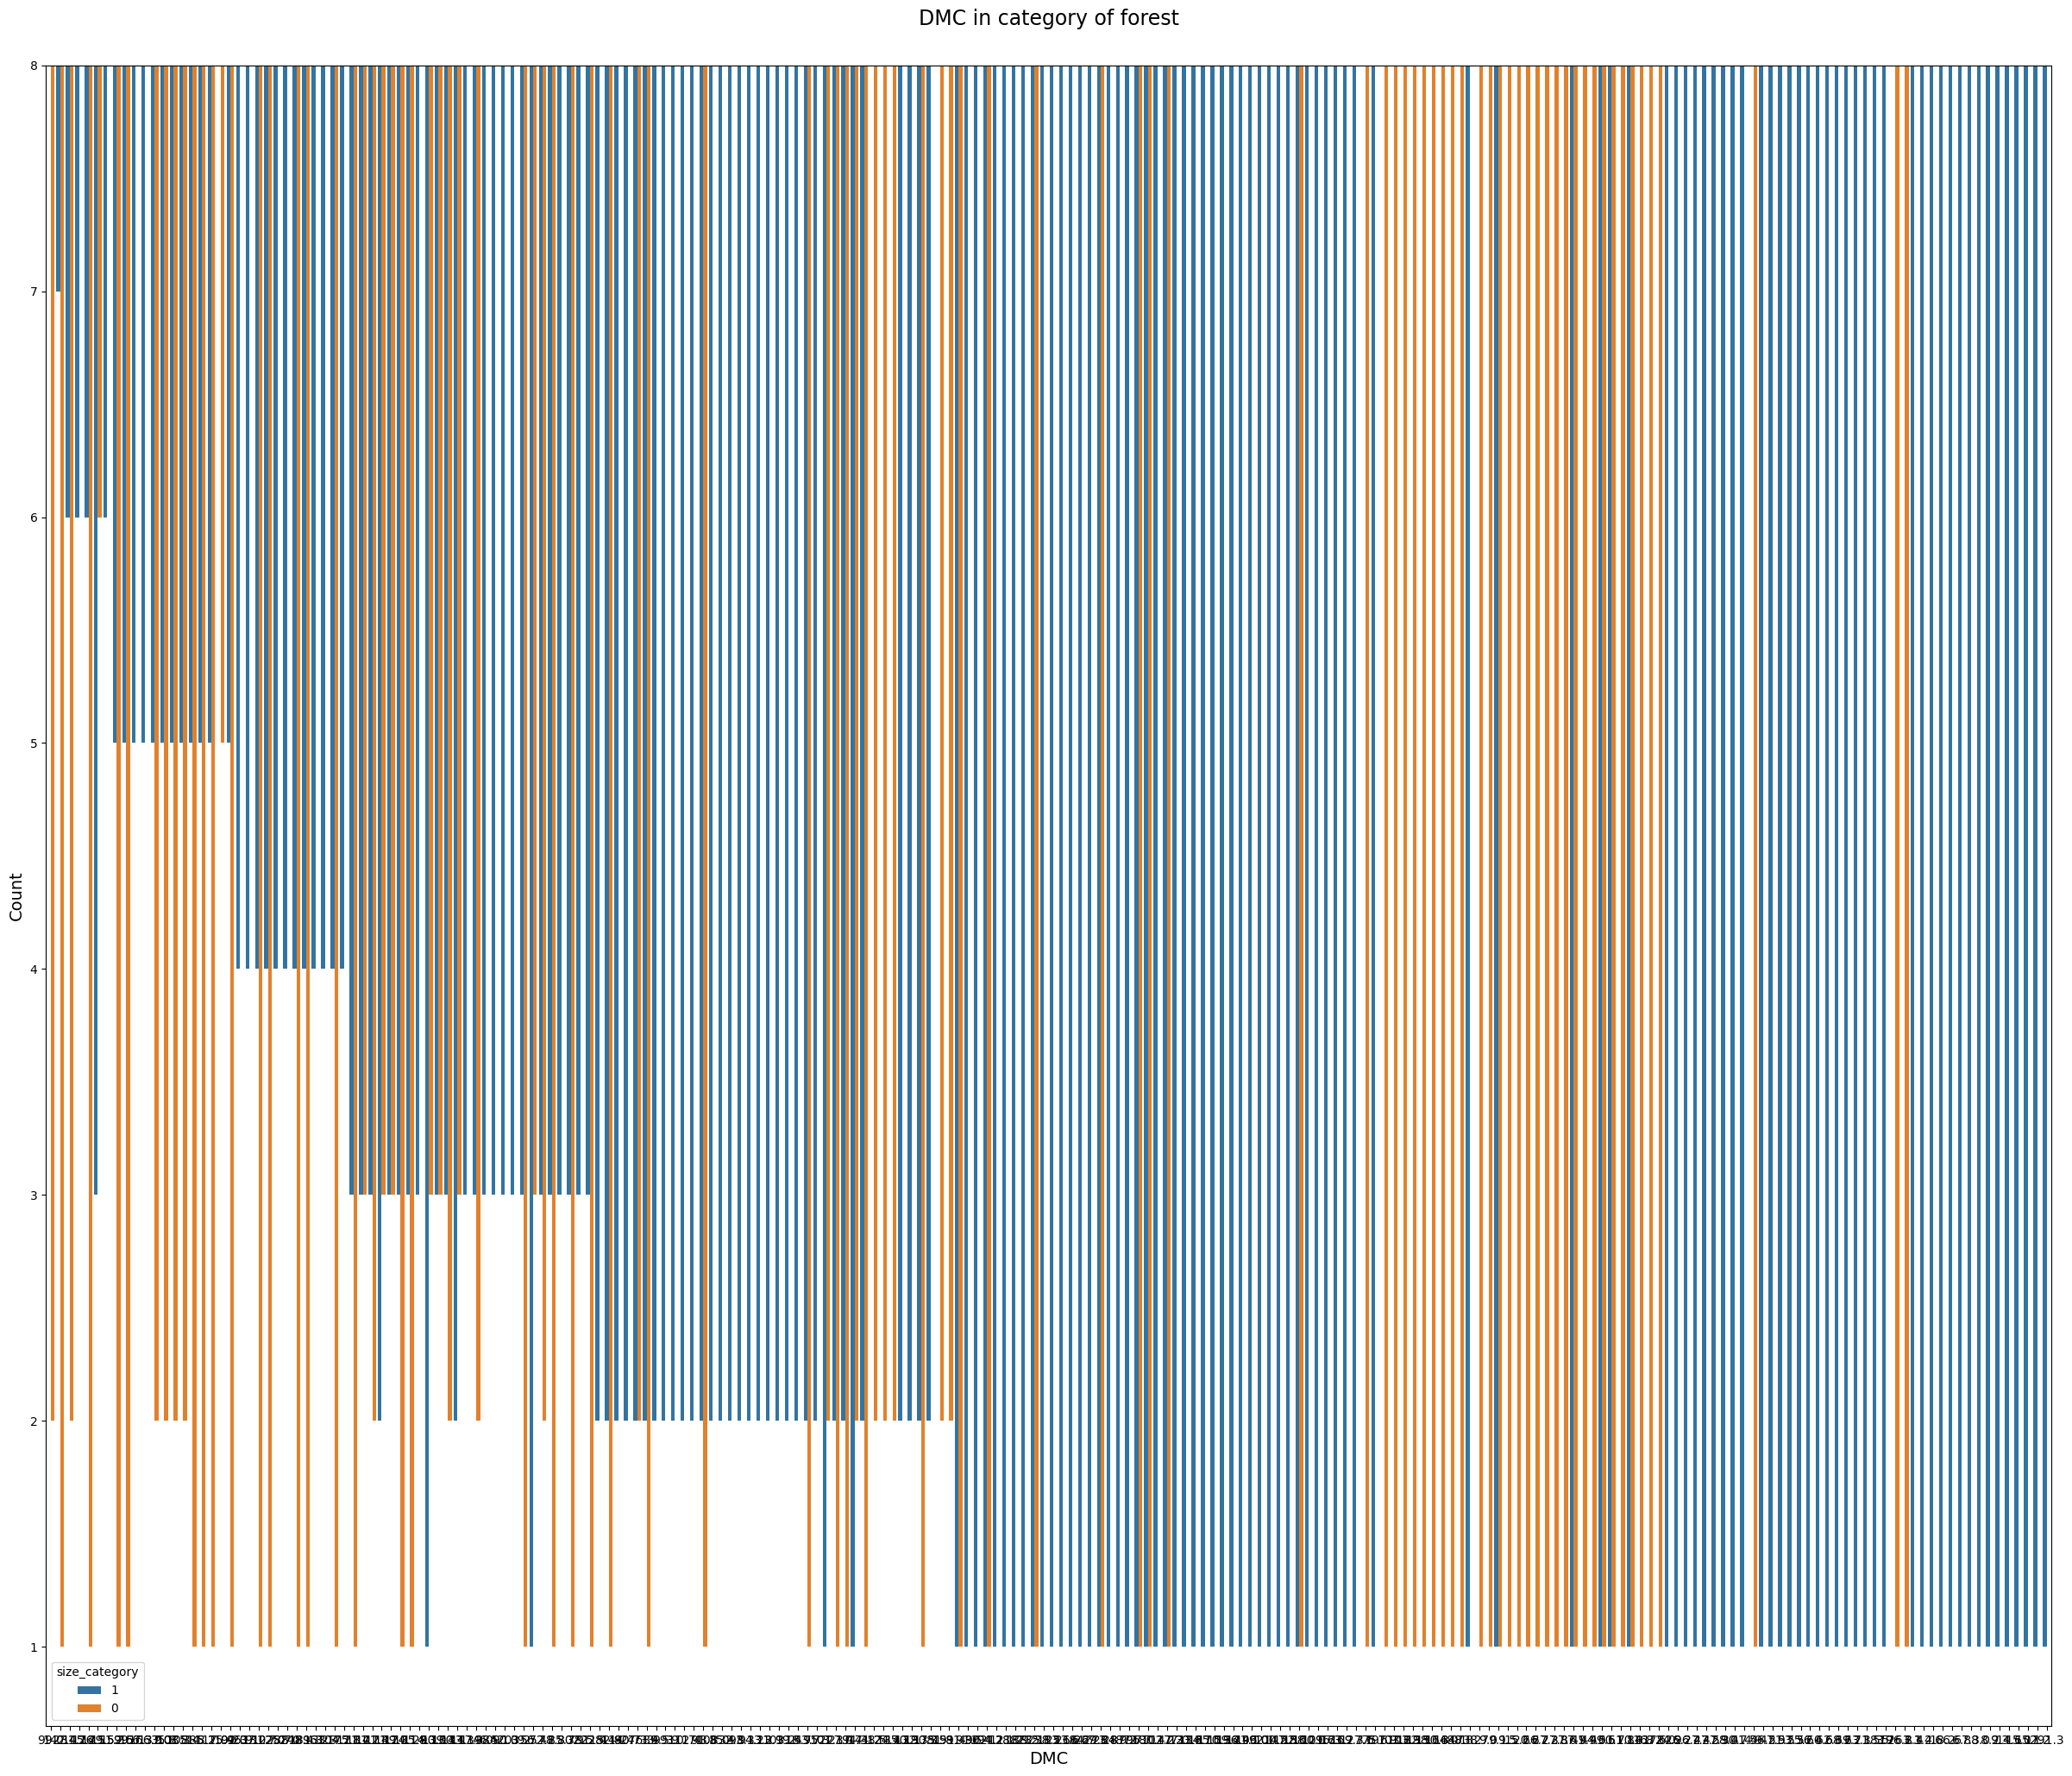

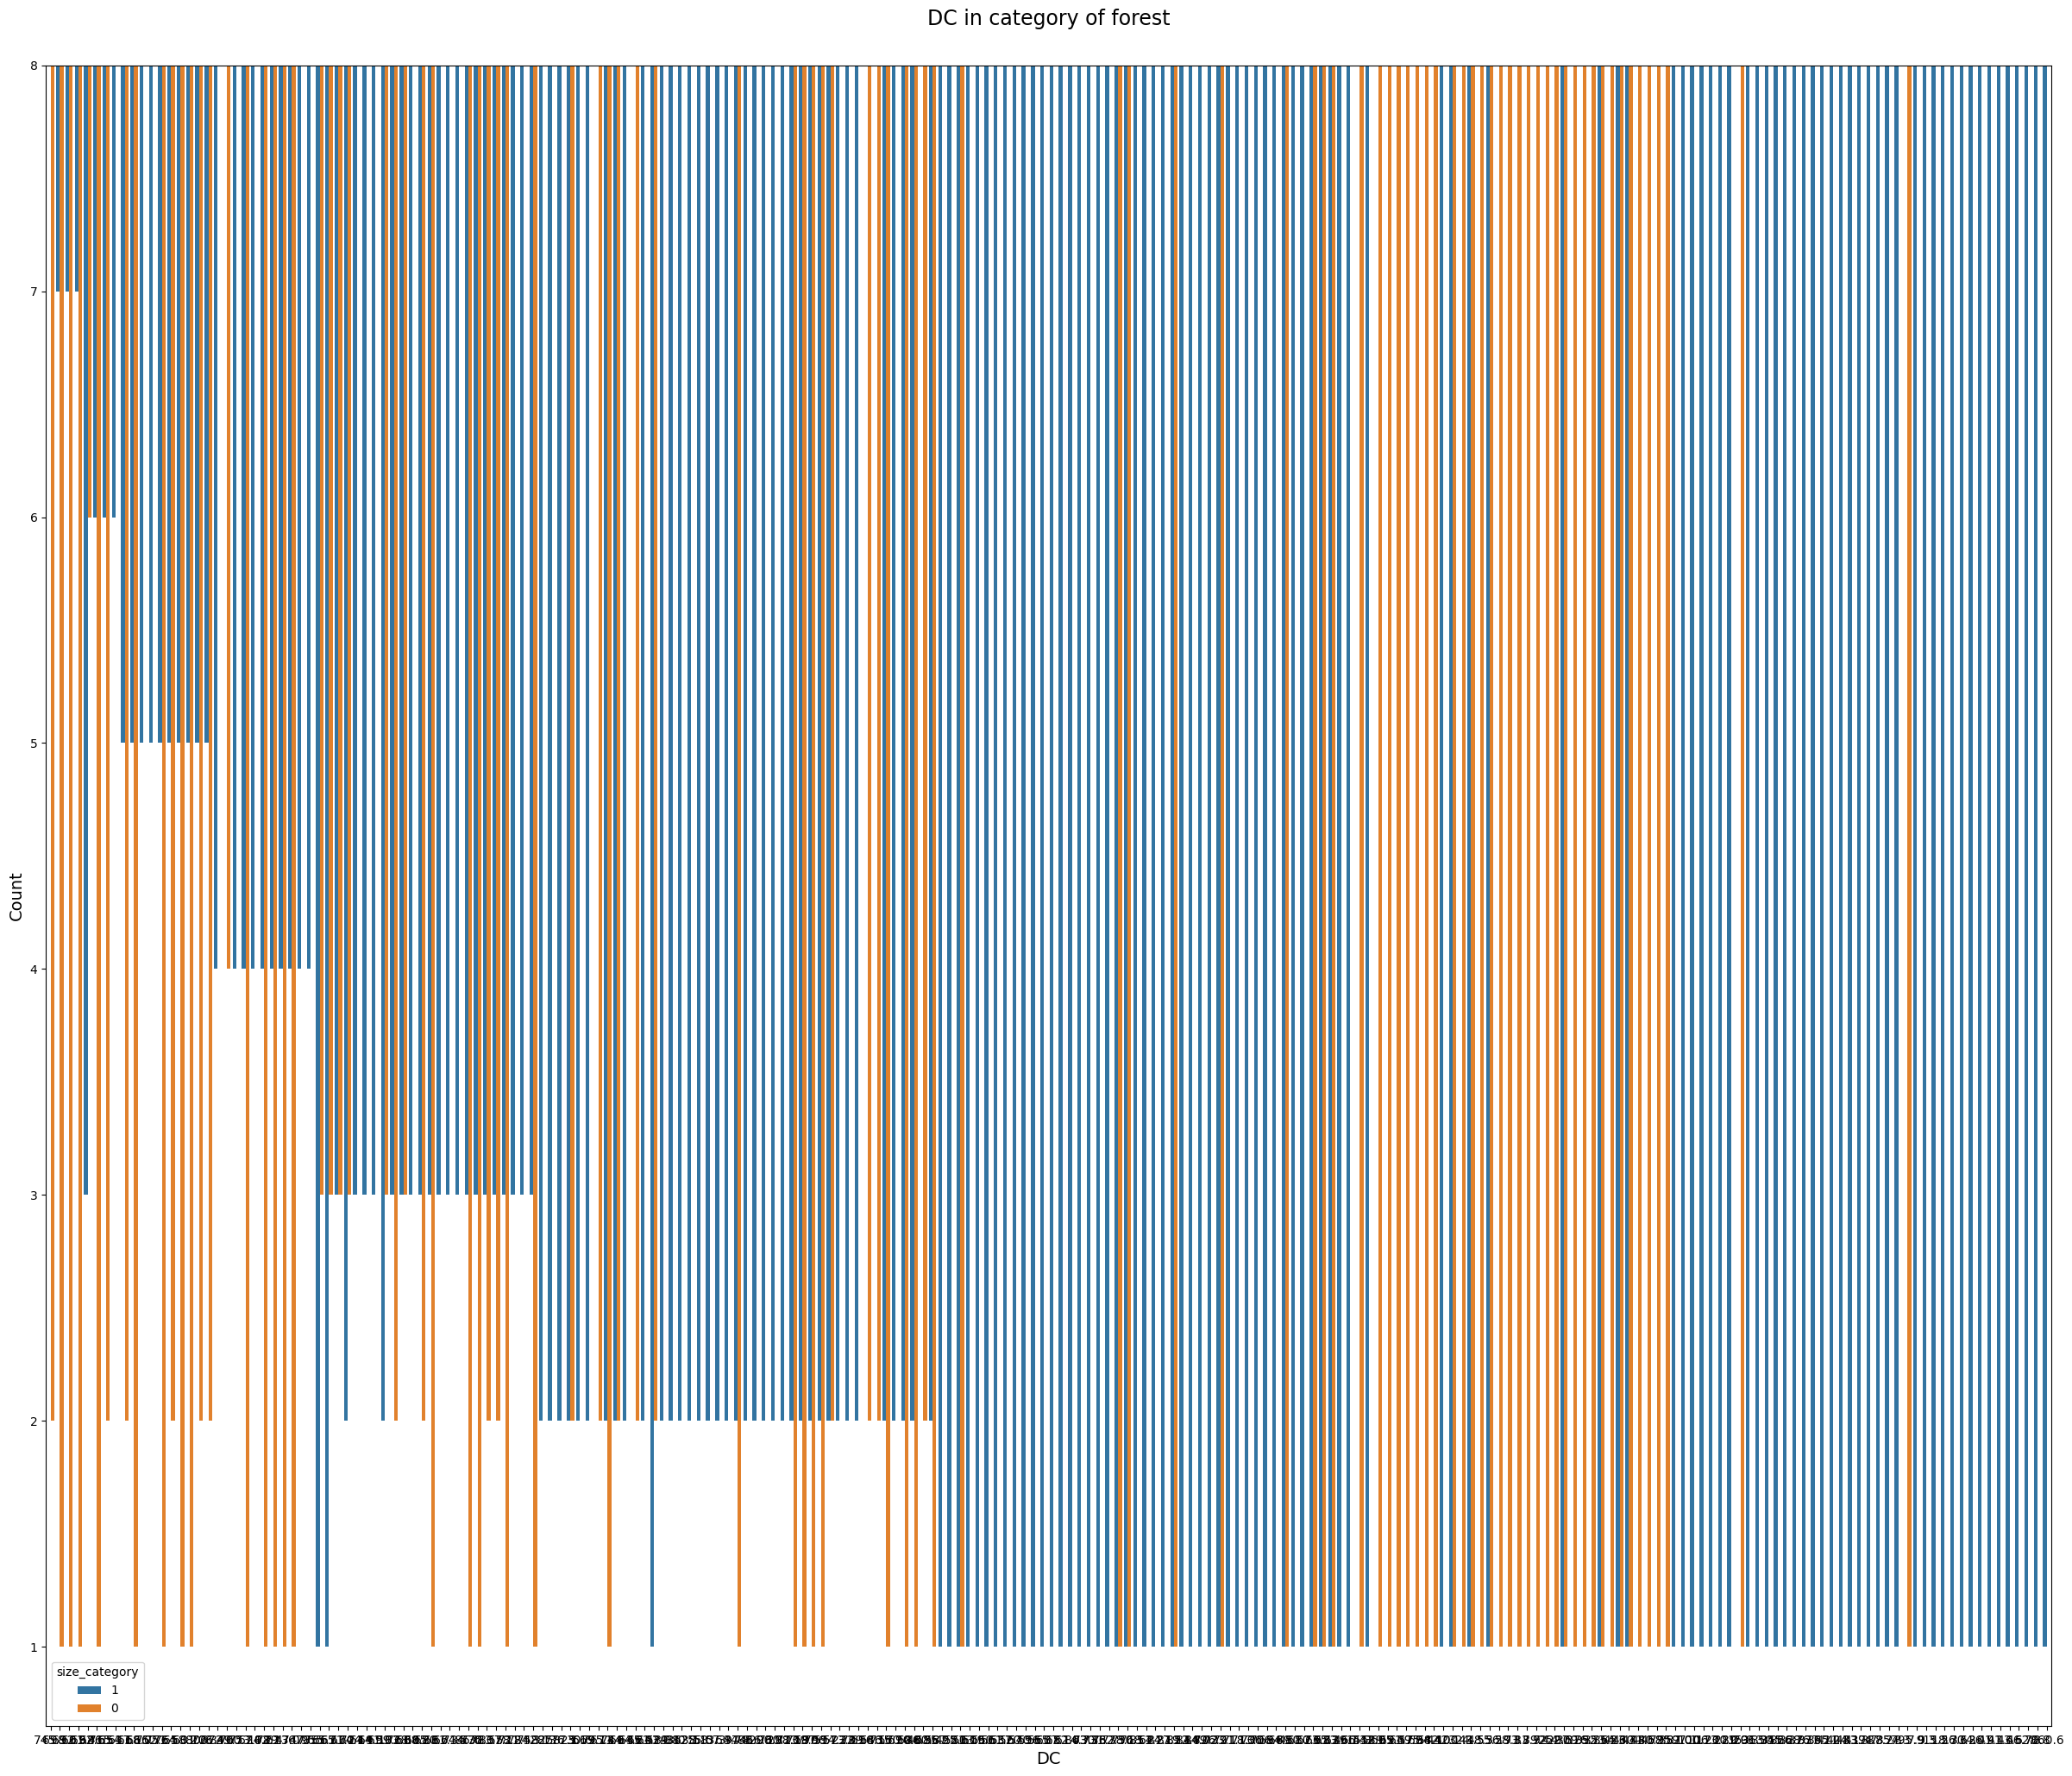

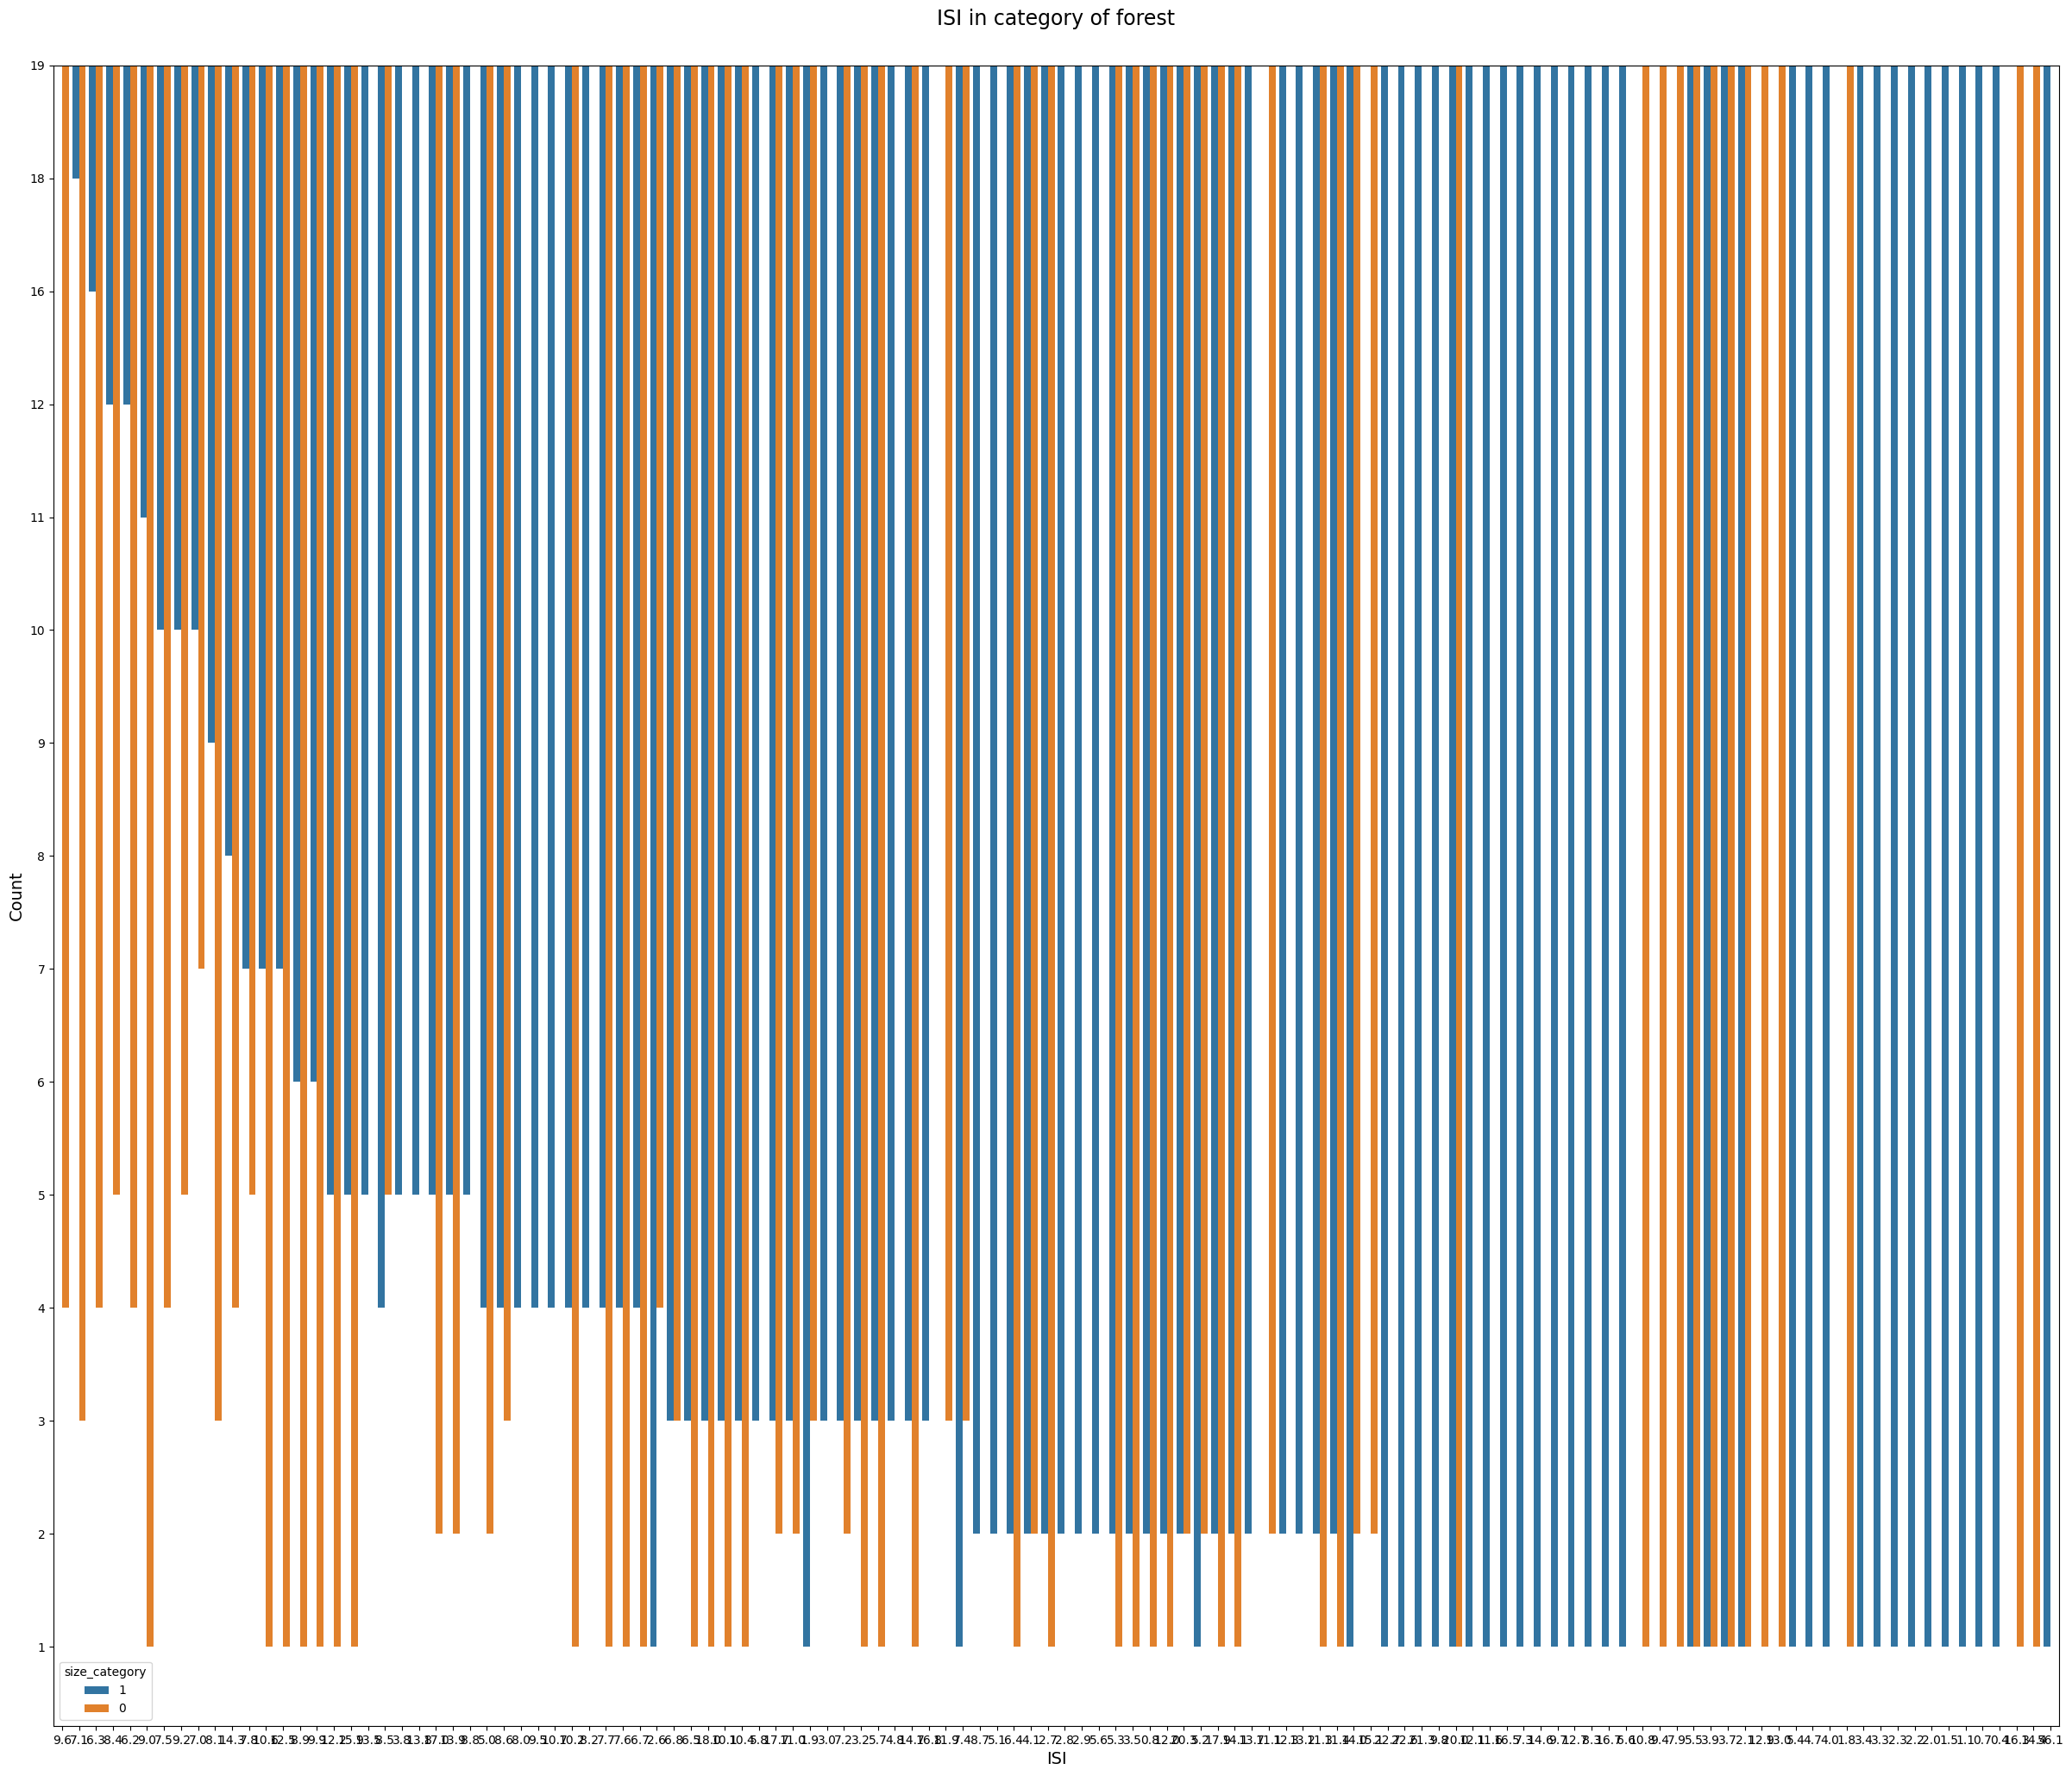

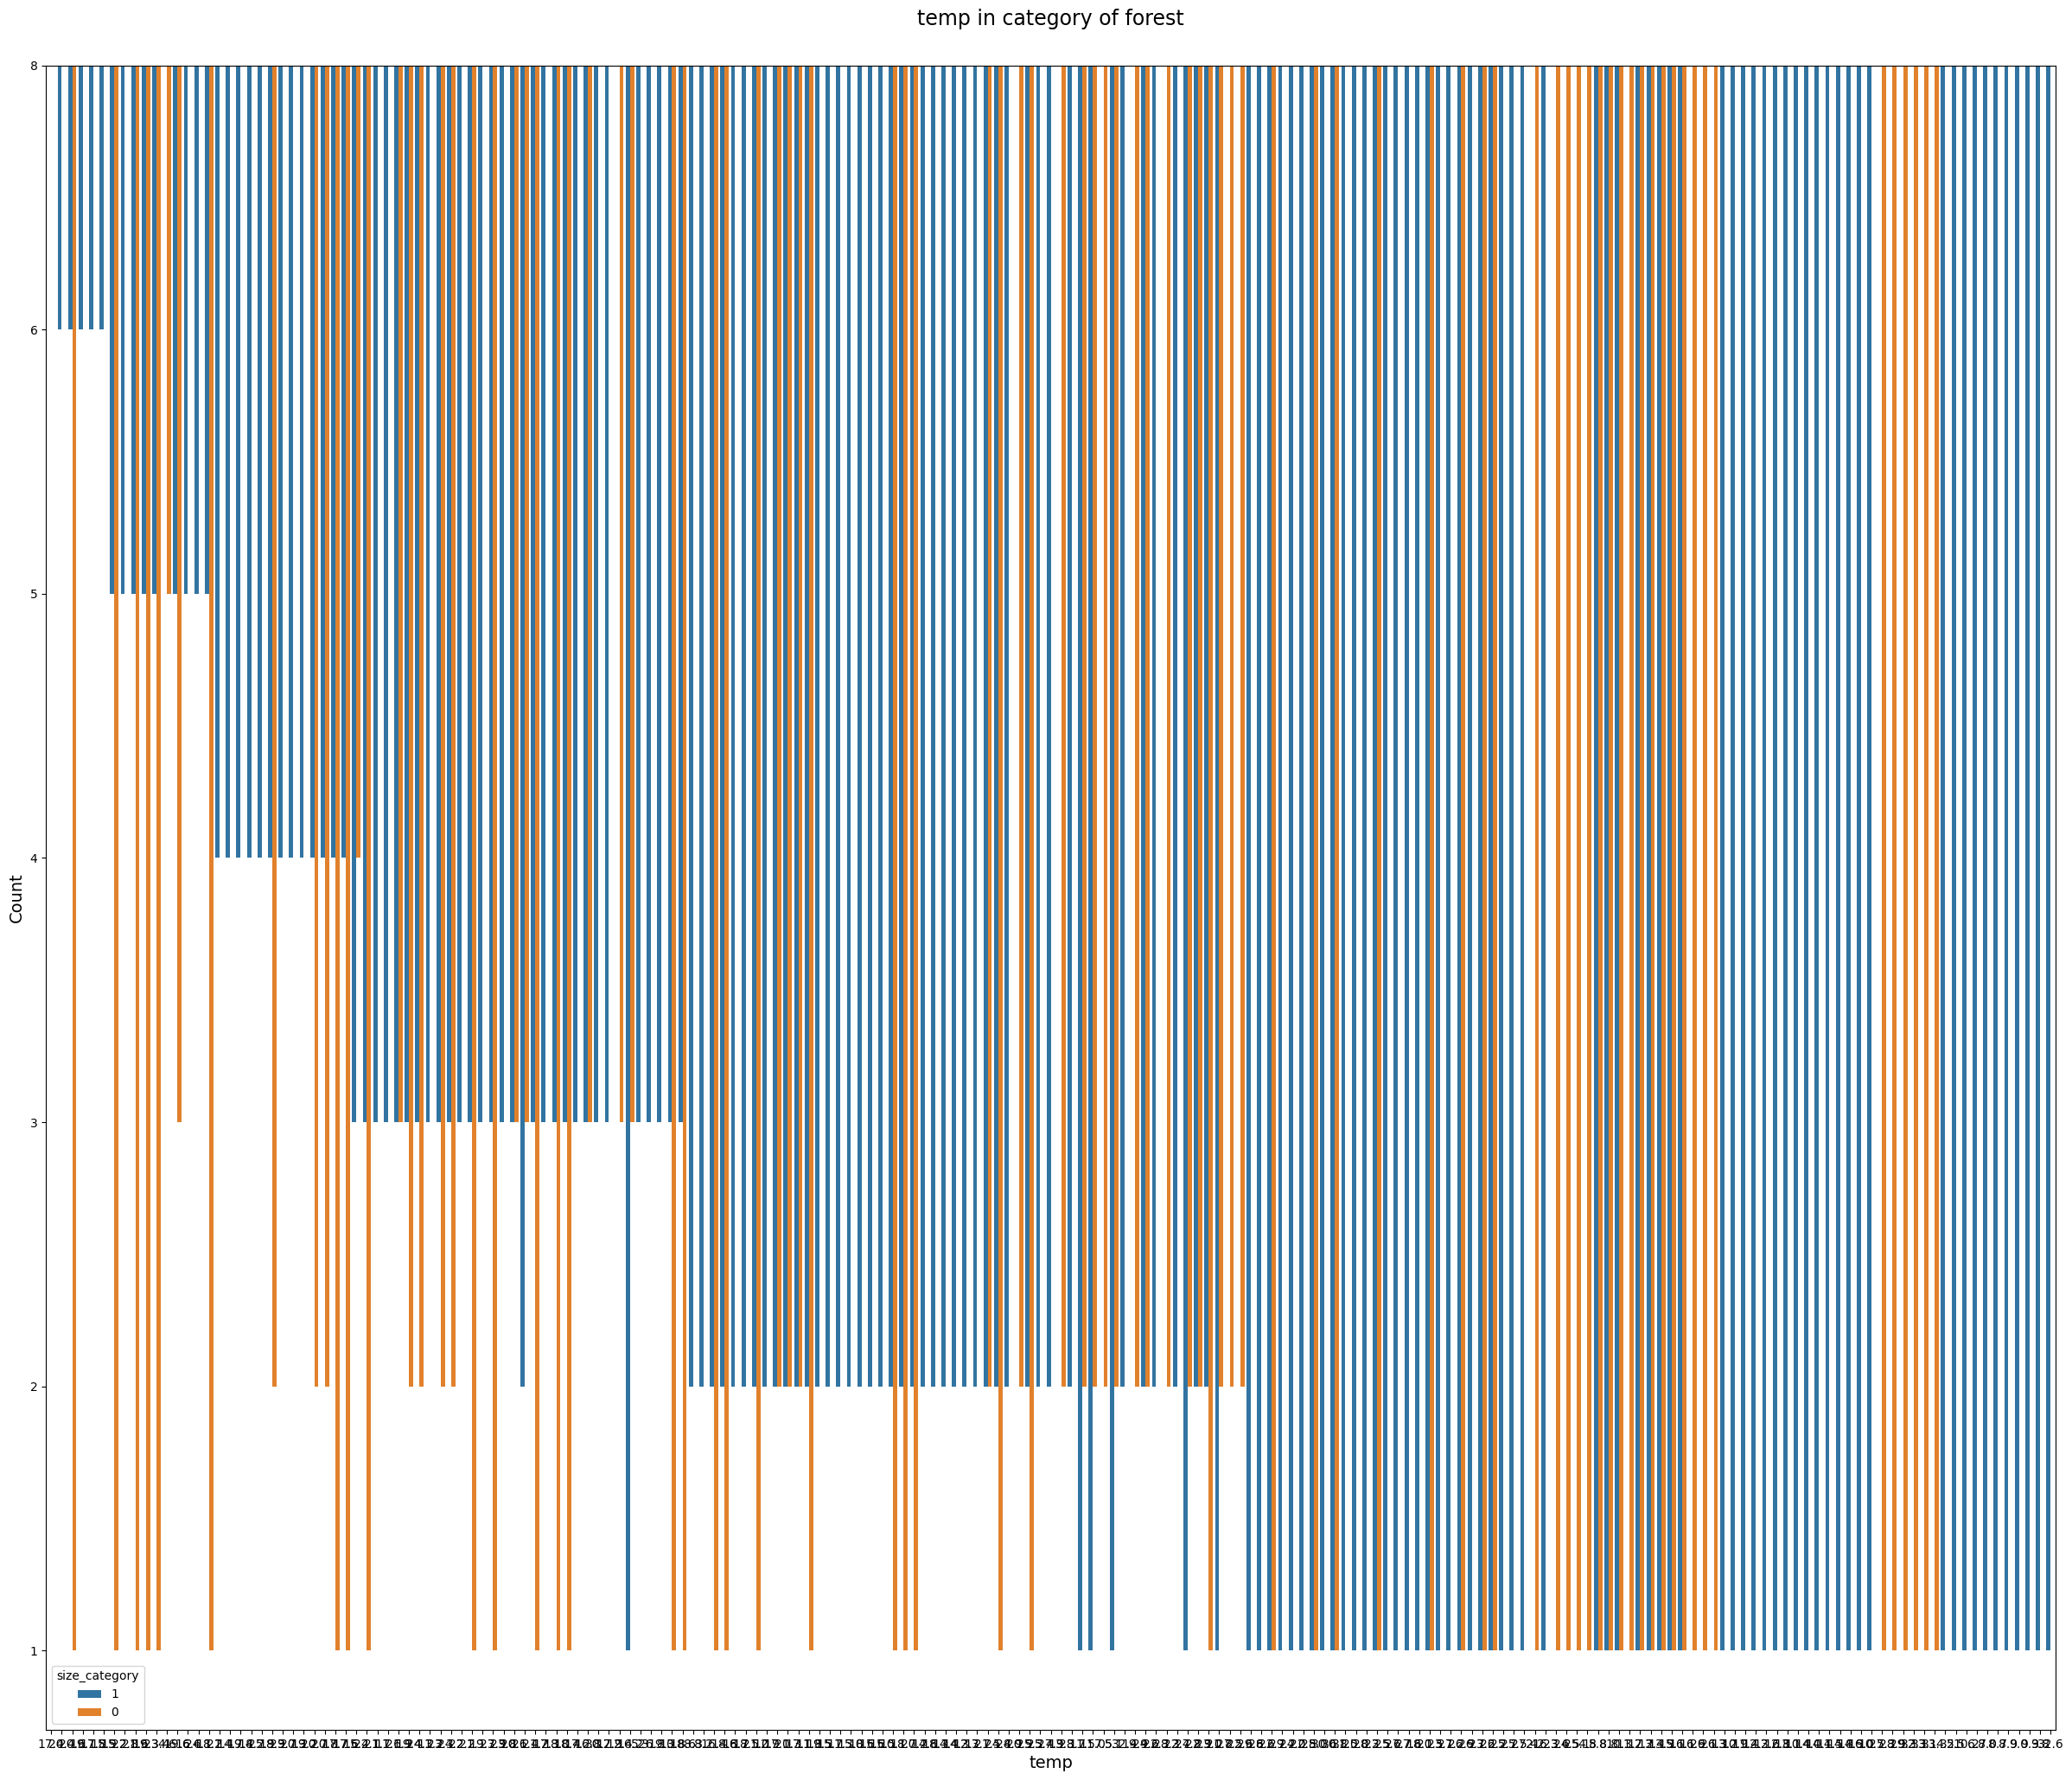

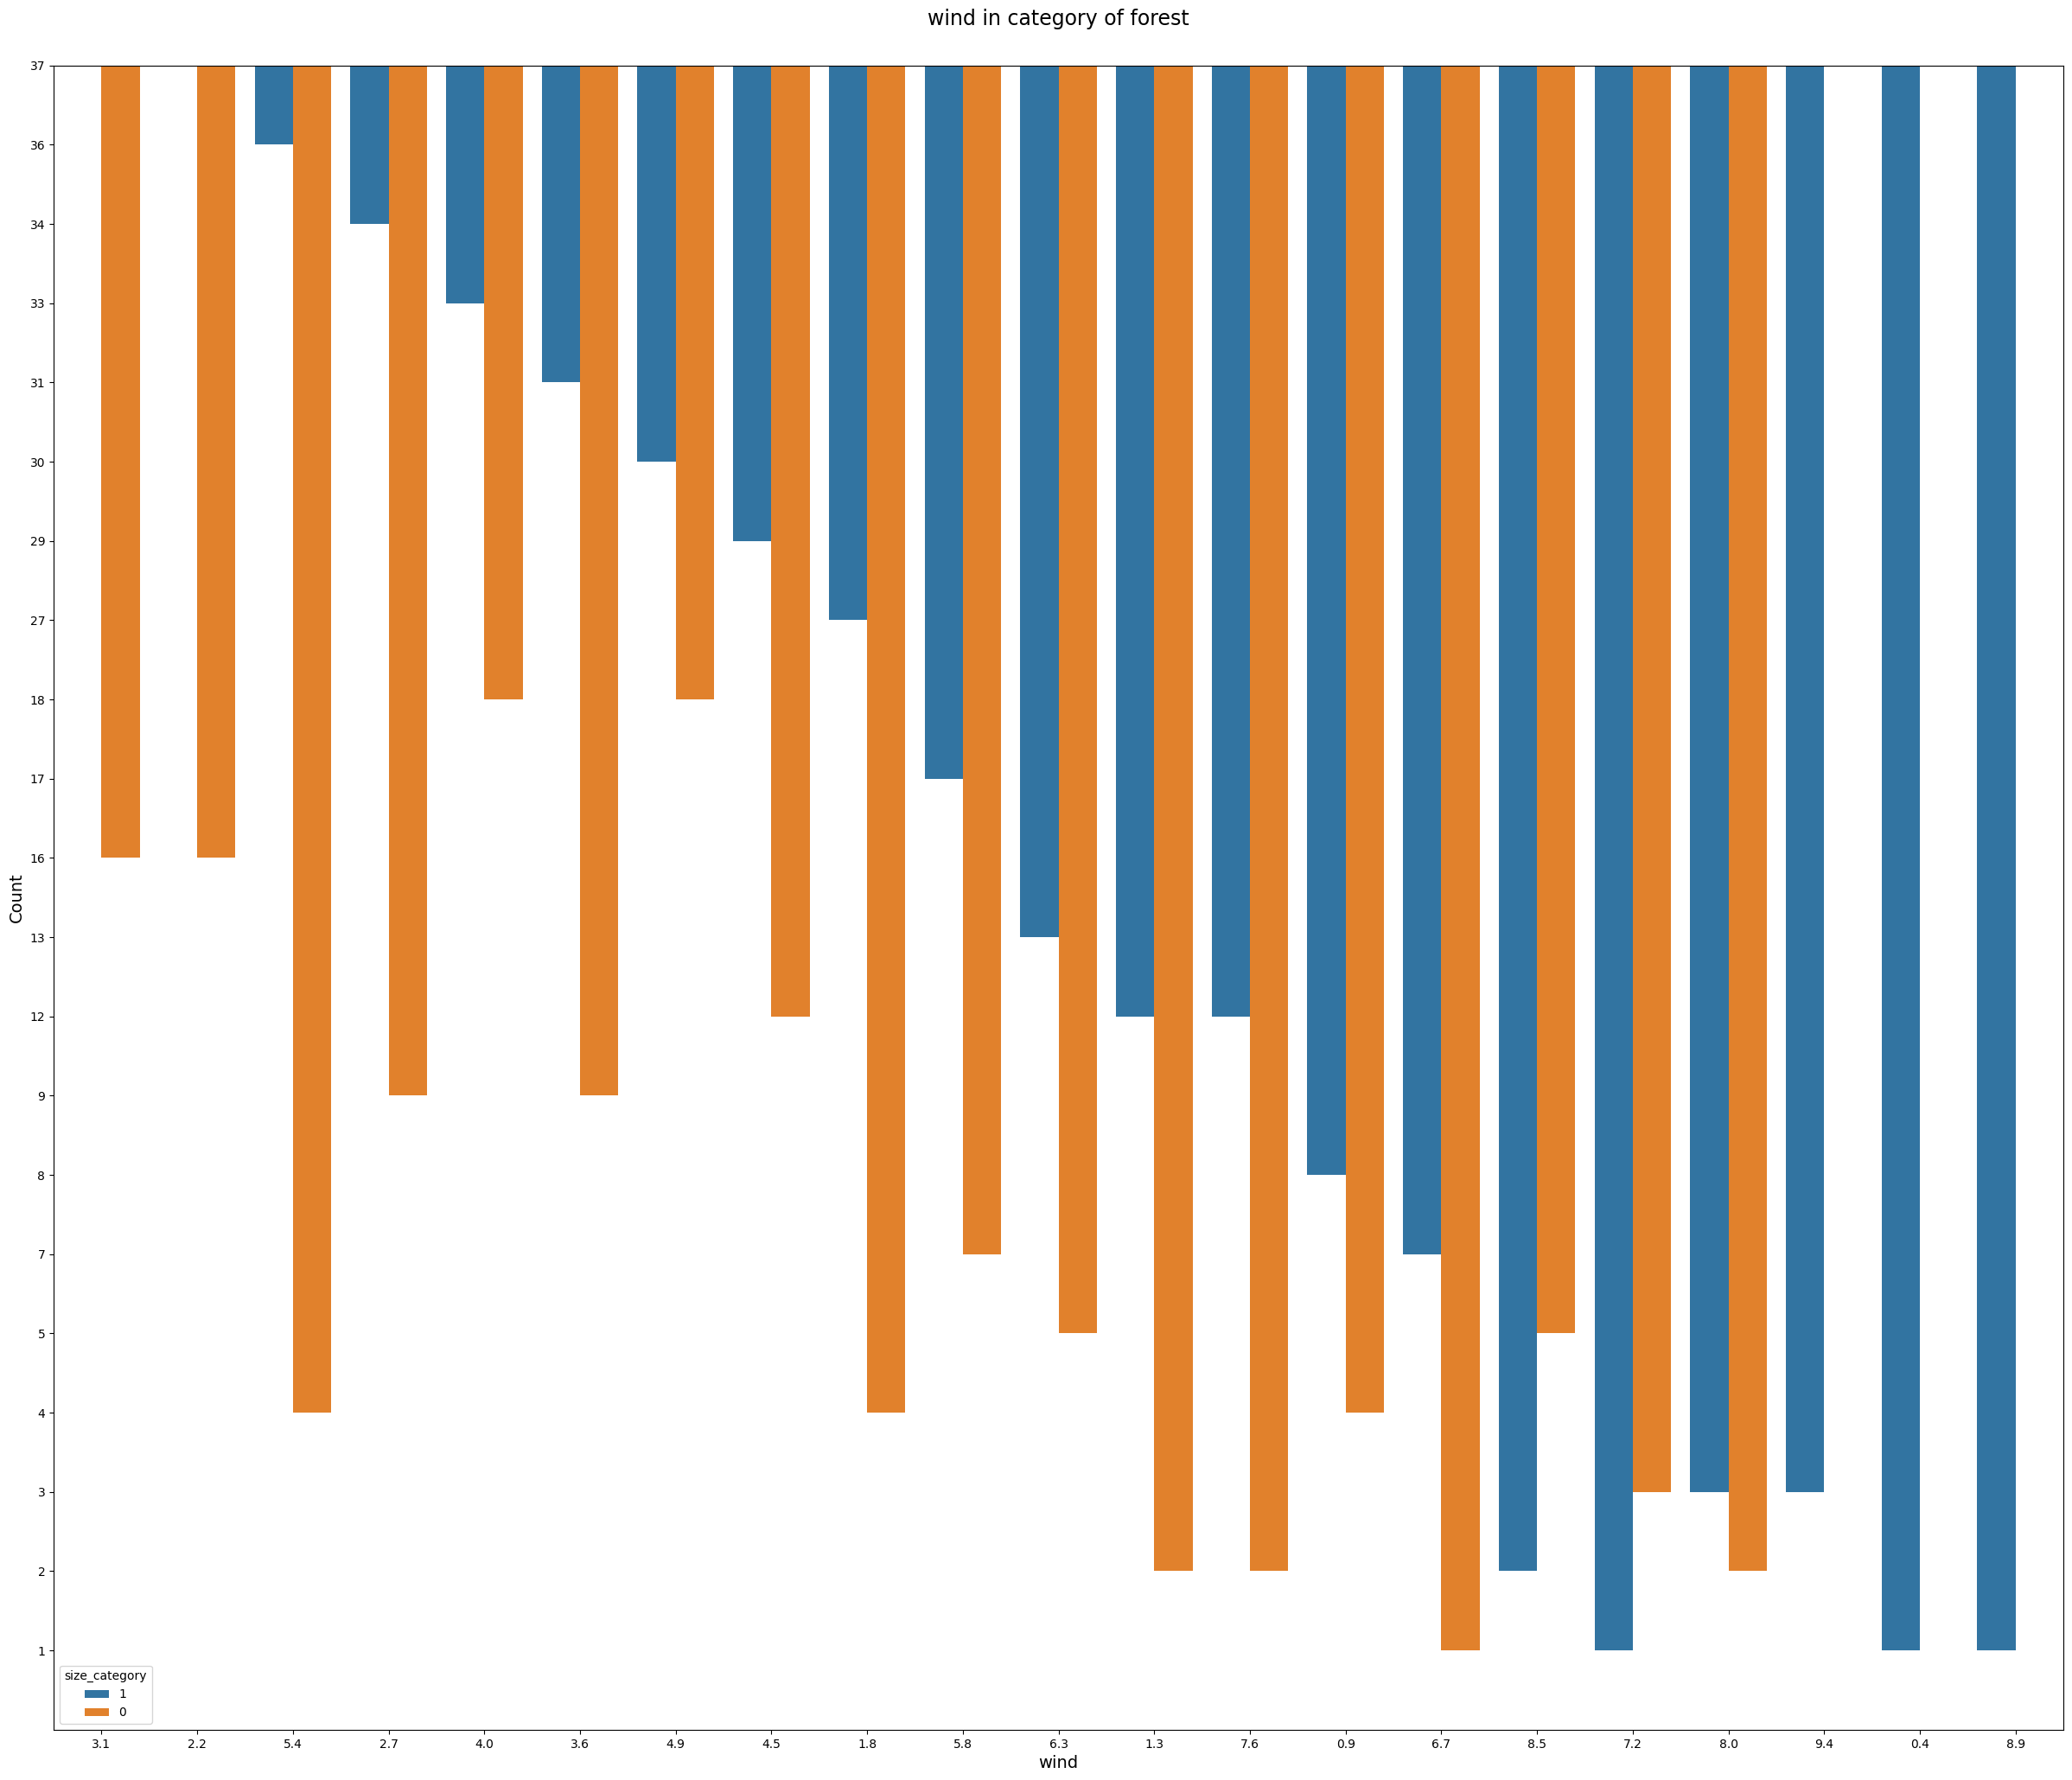

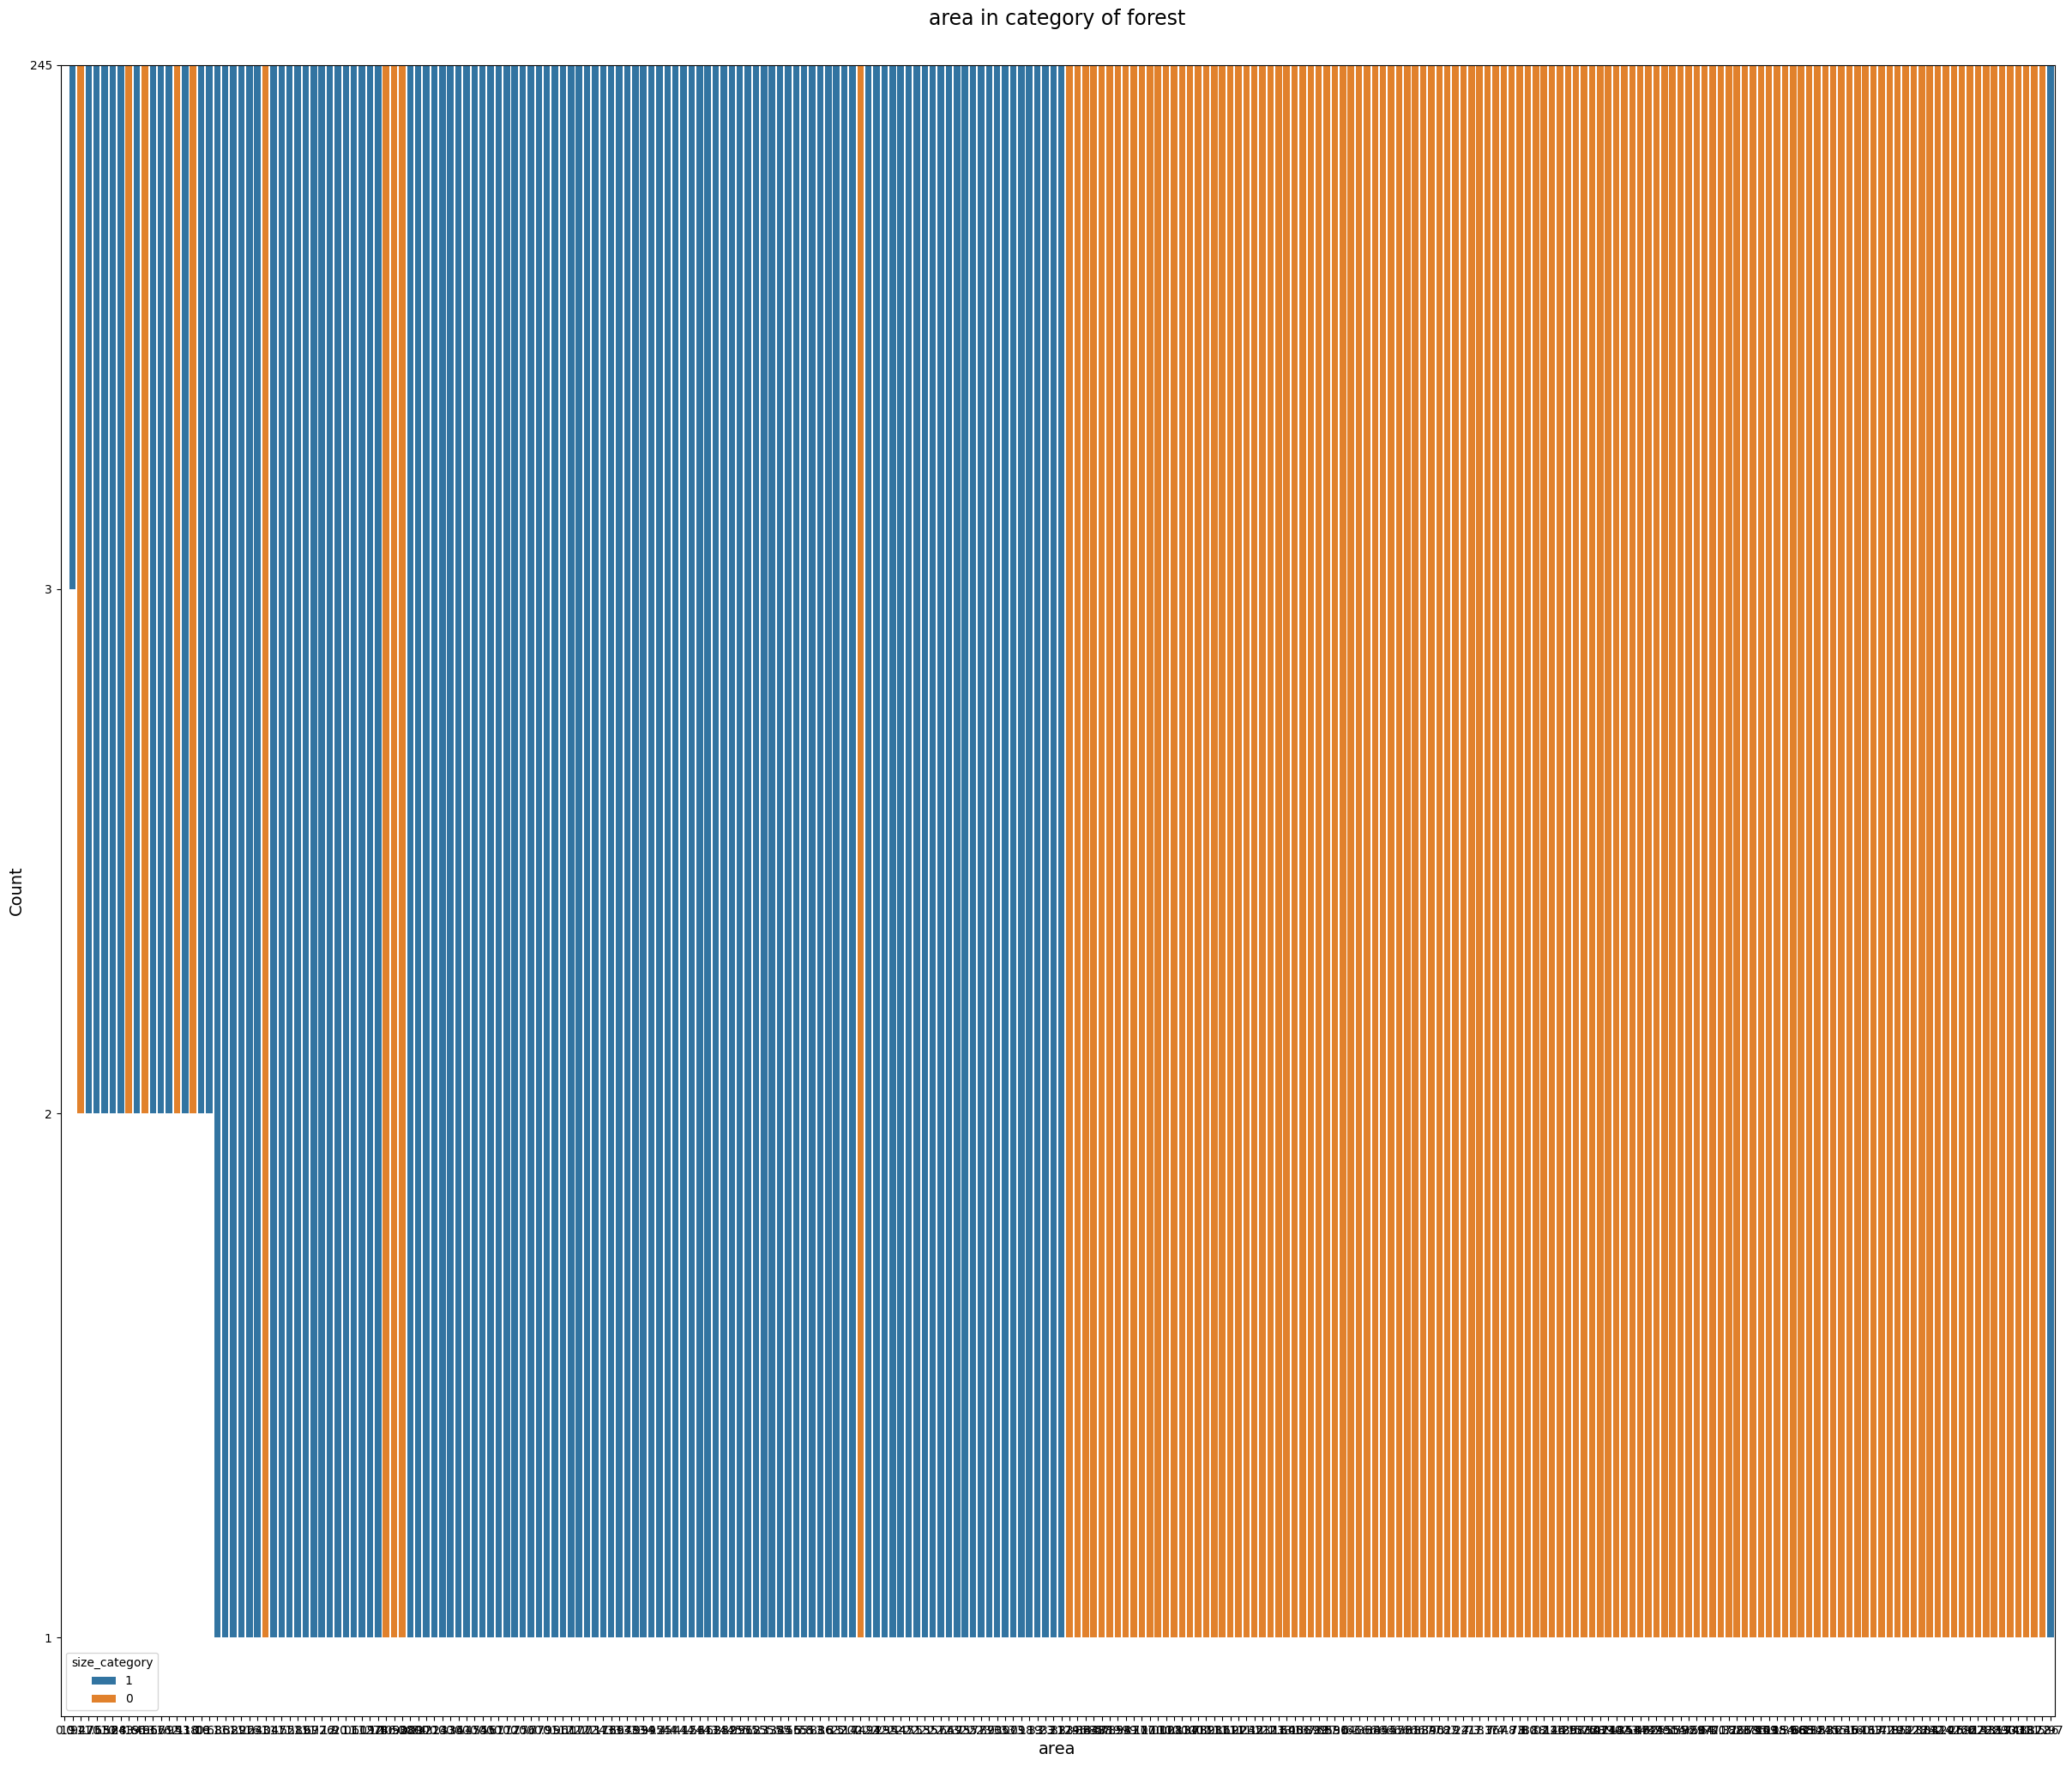

In [65]:
categories = ['RH', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'wind', 'area']
for c in categories:
    plot_bar(c)

### Data Processing

In [13]:
df.drop(['month', 'day', 'monthjan', 'daymon'], axis=1, inplace=True)
pd.set_option("display.max_columns", 27)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


#### Checking for Outliers

Outliers are observations that drastically behave differently from the rest of the observations

In [14]:
data1 = df.copy()

clf = IsolationForest(random_state=10, contamination=.01)

clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:, 0:27])
outliers = data1[data1['anamoly'] == -1]
print(outliers)

     FFMC   DMC     DC   ISI  temp   RH  wind  rain   area  dayfri  daysat  \
281  85.4  25.4  349.7   2.6   5.1   24   8.5   0.0  24.77       0       0   
299  53.4  71.0  233.8   0.4  10.6   90   2.7   0.0   0.00       0       1   
379  18.7   1.1  171.4   0.0   5.2  100   0.9   0.0   0.00       0       0   
463  75.1   4.4   16.2   1.9   4.6   82   6.3   0.0   5.39       0       0   
464  75.1   4.4   16.2   1.9   5.1   77   5.4   0.0   2.14       0       0   
469  91.0  14.6   25.6  12.3  13.7   33   9.4   0.0  61.13       0       0   

     daysun  daythu  ...  monthapr  monthaug  monthdec  monthfeb  monthjul  \
281       0       0  ...         0         0         1         0         0   
299       0       0  ...         0         0         0         0         0   
379       1       0  ...         0         0         0         0         0   
463       0       0  ...         0         0         0         1         0   
464       0       0  ...         0         0         0         

#### Removing Outliers
From the original 517 rows, we remove 6 outliers

In [15]:
df.drop(outliers.index, axis=0, inplace=True)
print(df.shape)

(511, 27)


In [16]:
x = df.drop('size_category', axis=1)
y = df['size_category']

`MinMaxScaler()` and `StandardScaler()` are sensitive to outliers

In [17]:
norm = MinMaxScaler()
std = StandardScaler()

x_norm = pd.DataFrame(norm.fit_transform(x), columns=x.columns)
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)
print(x_std.head())

       FFMC       DMC        DC       ISI      temp        RH      wind  \
0 -1.152145 -1.349327 -1.872882 -0.883826 -1.903660  0.439490  1.531449   
1 -0.080103 -1.204539  0.475150 -0.529429 -0.180137 -0.692844 -1.758092   
2 -0.080103 -1.073914  0.547862 -0.529429 -0.778094 -0.692844 -1.531227   
3  0.187908 -1.237588 -1.941509 -0.019983 -1.886073  3.333233  0.000111   
4 -0.396842 -0.954306 -1.840611  0.112916 -1.340877  3.459048 -1.247646   

       rain      area    dayfri    daysat    daysun    daythu    daytue  \
0 -0.073700 -0.200487  2.238697 -0.440369 -0.471686 -0.368179 -0.368179   
1 -0.073700 -0.200487 -0.446688 -0.440369 -0.471686 -0.368179  2.716072   
2 -0.073700 -0.200487 -0.446688  2.270821 -0.471686 -0.368179 -0.368179   
3  0.598809 -0.200487  2.238697 -0.440369 -0.471686 -0.368179 -0.368179   
4 -0.073700 -0.200487 -0.446688 -0.440369  2.120053 -0.368179 -0.368179   

     daywed  monthapr  monthaug  monthdec  monthfeb  monthjul  monthjun  \
0 -0.343747 -0.126113 -

## Model Building

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.33)

### Model Training

`GridSearchCV()` finds the optimal hyperparameter values for the SVM
- C: Regularization. 
    - Large C: Shorter margins
        - Fits the training data closely
        - May result in overfitting
        - Sensitive to outliers 
    - Small C: Longer margins
        - Allows more training errors
        - Generalizes better to unseen data
        - May lead to underfitting
- `best_score_`: Average performance (accuracy, F1-score, etc.) of the best hyperparameters found during grid search

In [55]:
def optimal_regularization(C, kernel, gamma):
    clf = SVC(gamma=gamma, kernel=kernel)
    grid = GridSearchCV(clf, [{'kernel':[kernel], 'C': C}], cv=20)
    return grid

def train_and_test(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(x_test))
    print(f"Best score = {model.best_score_:.3f}\nBest params = {model.best_params_}\nAccuracy = {accuracy:.2f}")

#### Test accuracy for rbf kernel with gamma as scale

In [64]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

candidate_C = [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001]
# Finding the best C for kernel rbf
train_and_test(x_train, y_train, x_test, y_test, 
               optimal_regularization(
                   C=candidate_C, 
                   kernel='rbf', 
                   gamma='scale'))

Best score = 0.831
Best params = {'C': 15, 'kernel': 'rbf'}
Accuracy = 0.85


#### Test accuracy for rbf kernel with gamma as auto

In [61]:
train_and_test(x_train, y_train, x_test, y_test, 
               optimal_regularization(
                   C=candidate_C, 
                   kernel='rbf', 
                   gamma='auto'))

Best score = 0.831
Best params = {'C': 15, 'kernel': 'rbf'}
Accuracy = 0.85


#### Grid search for polynomial kernel

In [63]:
train_and_test(x_train, y_train, x_test, y_test, 
               optimal_regularization(
                   C=candidate_C, 
                   kernel='poly', 
                   gamma='scale'))

Best score = 0.752
Best params = {'C': 15, 'kernel': 'poly'}
Accuracy = 0.78


#### Grid search for linear kernel

In [62]:
train_and_test(x_train, y_train, x_test, y_test, 
               optimal_regularization(
                   C=candidate_C, 
                   kernel='linear', 
                   gamma='scale'))

Best score = 0.976
Best params = {'C': 14, 'kernel': 'linear'}
Accuracy = 0.98
